In [140]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [141]:
from sklearn import metrics
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import ExtraTreesRegressor, HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, RANSACRegressor, RidgeCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [142]:
from sklearn import set_config

In [143]:
set_config(transform_output='pandas')

In [144]:
filepath = './data/kc_house_data.csv'

source_data = pd.read_csv(filepath)

source_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21607,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21608,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21609,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21610,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [145]:
source_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21612 entries, 0 to 21611
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21612 non-null  int64  
 1   date           21612 non-null  object 
 2   price          21612 non-null  float64
 3   bedrooms       21612 non-null  int64  
 4   bathrooms      21612 non-null  float64
 5   sqft_living    21612 non-null  int64  
 6   sqft_lot       21612 non-null  int64  
 7   floors         21612 non-null  float64
 8   waterfront     21612 non-null  int64  
 9   view           21612 non-null  int64  
 10  condition      21612 non-null  int64  
 11  grade          21612 non-null  int64  
 12  sqft_above     21612 non-null  int64  
 13  sqft_basement  21612 non-null  int64  
 14  yr_built       21612 non-null  int64  
 15  yr_renovated   21612 non-null  int64  
 16  zipcode        21612 non-null  int64  
 17  lat            21612 non-null  float64
 18  long  

In [146]:
source_data.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000
price,221900.0,538000.0,180000.0,604000.0,510000.0
bedrooms,3,3,2,4,3
bathrooms,1.0,2.25,1.0,3.0,2.0
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1.0,2.0,1.0,1.0,1.0
waterfront,0,0,0,0,0
view,0,0,0,0,0


---

**Quick Notes:**

> * `id`, `date`, `zipcode` are categoricals; need to convert
> * All other features numeric


---

***UPDATED NOTES:***

Considering the zip code, date, and ID values are either non-informative (ID, Date) or are more easily represented by other features (zip code), I will drop those features from the analysis.

---

In [147]:
# data.loc[:,['id', 'zipcode']] = data.loc[:,['id', 'zipcode']].astype('category')
# data.loc[:,['id', 'zipcode']]

In [148]:
# data.loc[:,['id', 'zipcode']].dtypes

In [149]:
# data['zipcode'].value_counts(dropna=False, normalize=False, ascending=False)

In [150]:
drop_features = ['id', 'date', 'zipcode']

# data_w_zips = data.drop(columns = ['id', 'date'])

data = source_data.drop(columns = drop_features)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21607,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21608,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21609,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21610,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21612 entries, 0 to 21611
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21612 non-null  float64
 1   bedrooms       21612 non-null  int64  
 2   bathrooms      21612 non-null  float64
 3   sqft_living    21612 non-null  int64  
 4   sqft_lot       21612 non-null  int64  
 5   floors         21612 non-null  float64
 6   waterfront     21612 non-null  int64  
 7   view           21612 non-null  int64  
 8   condition      21612 non-null  int64  
 9   grade          21612 non-null  int64  
 10  sqft_above     21612 non-null  int64  
 11  sqft_basement  21612 non-null  int64  
 12  yr_built       21612 non-null  int64  
 13  yr_renovated   21612 non-null  int64  
 14  lat            21612 non-null  float64
 15  long           21612 non-null  float64
 16  sqft_living15  21612 non-null  int64  
 17  sqft_lot15     21612 non-null  int64  
dtypes: flo

# Data Inspection

In [152]:
# # sns.displot(data = data, y= 'price')

# sns.pairplot(data=data, corner = True);

In [153]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
price,21612.0,540098.79,367132.35,75000.00,321987.50,450000.00,645000.00,7700000.00
bedrooms,21612.0,3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,21612.0,2.11,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,21612.0,2079.93,918.45,290.00,1426.50,1910.00,2550.00,13540.00
sqft_lot,21612.0,15106.75,41421.46,520.00,5040.00,7617.50,10687.25,1651359.00
floors,21612.0,1.49,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,21612.0,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,21612.0,0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,21612.0,3.41,0.65,1.00,3.00,3.00,4.00,5.00
grade,21612.0,7.66,1.18,1.00,7.00,7.00,8.00,13.00


In [154]:
data_large = data.loc[:, (data.max() > 100)]
data_large

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,1180,5650,1180,0,1955,0,1340,5650
1,538000.0,2570,7242,2170,400,1951,1991,1690,7639
2,180000.0,770,10000,770,0,1933,0,2720,8062
3,604000.0,1960,5000,1050,910,1965,0,1360,5000
4,510000.0,1680,8080,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...
21607,360000.0,1530,1131,1530,0,2009,0,1530,1509
21608,400000.0,2310,5813,2310,0,2014,0,1830,7200
21609,402101.0,1020,1350,1020,0,2009,0,1020,2007
21610,400000.0,1600,2388,1600,0,2004,0,1410,1287


In [155]:
data_large.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
price,21612.0,540098.79,367132.35,75000.0,321987.5,450000.0,645000.00,7700000.0
sqft_living,21612.0,2079.93,918.45,290.0,1426.5,1910.0,2550.00,13540.0
sqft_lot,21612.0,15106.75,41421.46,520.0,5040.0,7617.5,10687.25,1651359.0
sqft_above,21612.0,1788.41,828.11,290.0,1190.0,1560.0,2210.00,9410.0
sqft_basement,21612.0,291.52,442.58,0.0,0.0,0.0,560.00,4820.0
yr_built,21612.0,1971.01,29.37,1900.0,1951.0,1975.0,1997.00,2015.0
yr_renovated,21612.0,84.41,401.69,0.0,0.0,0.0,0.00,2015.0
sqft_living15,21612.0,1986.56,685.41,399.0,1490.0,1840.0,2360.00,6210.0
sqft_lot15,21612.0,12768.46,27304.81,651.0,5100.0,7620.0,10083.00,871200.0


In [156]:
years_until_renovation = data['yr_renovated'] - data['yr_built']
years_until_renovation

0       -1955
1          40
2       -1933
3       -1965
4       -1987
         ... 
21607   -2009
21608   -2014
21609   -2009
21610   -2004
21611   -2008
Length: 21612, dtype: int64

In [157]:
data['yrs_until_reno'] = np.where((years_until_renovation < 0), 0, years_until_renovation)
data['yrs_until_reno']

0         0
1        40
2         0
3         0
4         0
         ..
21607     0
21608     0
21609     0
21610     0
21611     0
Name: yrs_until_reno, Length: 21612, dtype: int64

In [158]:
data['yrs_until_reno'].describe()

count    21612.000000
mean         2.380992
std         12.359804
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        114.000000
Name: yrs_until_reno, dtype: float64

In [159]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,yrs_until_reno
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,40
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21607,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,0
21608,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,0
21609,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,0
21610,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,0


# Train/Test Split

In [160]:
target_feature = 'price'

X = data.drop(columns = target_feature)
y = data.loc[:, target_feature]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

In [161]:
# preprocessor = StandardScaler()
# preprocessor

In [162]:
# preprocessor.fit_transform(X_train)

In [163]:
# preprocessor.n_samples_seen_

In [164]:
# y_train

# Preprocessing Pipeline

## Impact of TransformedTargetRegressor

Performing a log transformation on the `price` target feature reduces the right-tailed skewness, making the target more closely match the normal distribution.

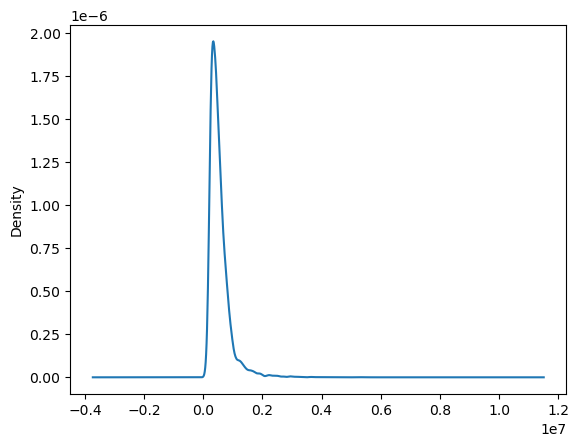

In [165]:
data['price'].plot(kind = 'kde');

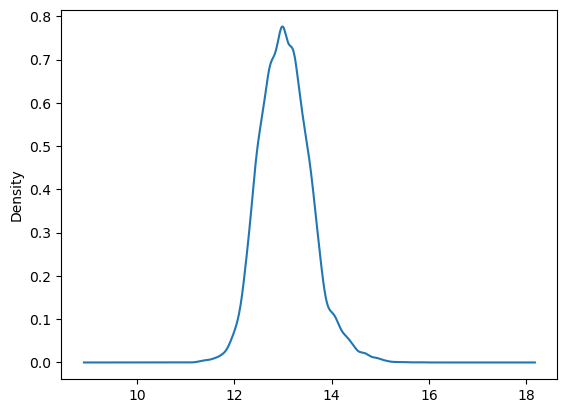

In [166]:
data['price'].apply(np.log1p).plot(kind='kde');

## Pipeline Generation

# Regression: OLS

In [167]:
regressor = LinearRegression()

In [168]:
ttreg = TransformedTargetRegressor(regressor=regressor, func = np.log1p, inverse_func = np.expm1)

model_pipeline = make_pipeline(StandardScaler(), ttreg)
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=LinearRegression()))])

In [169]:
print(f'''Training model R^2: {model_pipeline.score(X_train, y_train):.2f}

Testing model R^2: {model_pipeline.score(X_test, y_test):.2f}''')

Training model R^2: 0.66

Testing model R^2: 0.74


In [170]:
y_pred = model_pipeline.predict(X_test)
y_pred

array([ 540223.99552209,  381159.68019465,  566224.900168  , ...,
        579766.56985856, 1876510.04298073,  696145.97196237])

In [171]:
# model_pipeline.named_steps['standardscaler'].inverse_transform(X_test)

In [172]:
rmse = metrics.mean_squared_error(y_test, y_pred, squared = False).round(2)
rmse

194258.1

In [173]:
f'The RMSE is {rmse / y_test.mean():.2%} of the average price.'

'The RMSE is 35.49% of the average price.'

In [175]:
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)

f'The results are within {mape:.2%} of the average price.'

'The results are within 20.21% of the average price.'

In [55]:
# X_train_scaled = preprocessor.transform(X_train)
# X_train_scaled

In [56]:
# preprocessor.feature_names_in_

In [57]:
# preprocessor.get_feature_names_out()

In [58]:
# linreg = LinearRegression(n_jobs = -2)

# linreg.fit(preprocessor, y_train)

# Regression: Random Forest Regressor

In [83]:
data_zip_cats = data_w_zips.copy()
data_zip_cats['zipcode'] = data_zip_cats['zipcode'].astype('category')
data_zip_cats['zipcode'].head()

0    98178
1    98125
2    98028
3    98136
4    98074
Name: zipcode, dtype: category
Categories (70, int64): [98001, 98002, 98003, 98004, ..., 98178, 98188, 98198, 98199]

In [85]:
# data_zip_cats.info()

In [86]:
target_feature = 'price'

source_data = data_zip_cats

X = source_data.drop(columns = target_feature)
y = source_data.loc[:, target_feature]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

In [87]:
rfr = RandomForestRegressor(n_jobs = -1)

rfr.fit(X_train, y_train)
rfr.score(X_test, y_test).round(4)

0.8891

## RFR with TTR

In [183]:
regressor = LinearRegression()

In [184]:
ttreg = TransformedTargetRegressor(regressor=rfr, func = np.log1p, inverse_func = np.expm1)

model_pipeline = make_pipeline(StandardScaler(), ttreg)

In [185]:
model_pipeline.fit(X_train, y_train)
model_pipeline.score(X_train, y_train).round(4)

0.9772

In [186]:
model_pipeline.score(X_test, y_test).round(4)

0.8733

In [187]:
y_pred = model_pipeline.predict(X_test)

mape = metrics.mean_absolute_percentage_error(y_test, y_pred)

f'The results are within {mape:.2%} of the average price.'

'The results are within 13.00% of the average price.'

In [88]:
# rfr.feature_names_in_, rfr.feature_importances_.round(4)

# Regression: HistGradientBoostingRegressor

In [89]:
hgbr = HistGradientBoostingRegressor(random_state=42)

hgbr.fit(X_train, y_train)
hgbr.score(X_test, y_test).round(4)

0.8909

# Iterative Testing

## Flexible Function

In [106]:
def model_testing(
    source_data = None,
    target_feature = None,
    test_size = .25,
    random_state = 42,
    model = None,
    model_settings = None
):
    
    '''Probably could just do a gridsearch, but lazy. Easy way to rotate data, models.'''
    
    X = source_data.drop(columns = target_feature)
    y = source_data.loc[:, target_feature]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)

    model.fit(X_train, y_train)

    return {'model': model, 'score': model.score(X_test, y_test).round(4)}

In [107]:
sample_data = source_data.drop(columns = ['id', 'date'])

## RFR 

In [117]:
rfr_model = model_testing(source_data = sample_data,
                          target_feature = 'price',
                          model = RandomForestRegressor(n_jobs = -1))
rfr_model['score']

0.8848

## HGBR

In [130]:
hgbr_model = model_testing(source_data = sample_data,
                          target_feature = 'price',
                          model = HistGradientBoostingRegressor())
hgbr_model['score']

0.8901

## ExtraTreesRegressor

In [131]:
etr_model = model_testing(source_data = sample_data,
                          target_feature = 'price',
                          model = ExtraTreesRegressor(n_jobs = -1))
etr_model['score']

0.8752

## RANSACRegressor

---

Tried different combinations of fields, dtypes, but always performed worse than any decision-tree-based method.

---

In [127]:
num_data = source_data.drop(columns = ['id', 'date'])
num_data_no_zip = source_data.drop(columns = ['id', 'date', 'zipcode'])

In [129]:
fit_model = model_testing(source_data = num_data,
                          target_feature = 'price',
                          model = RANSACRegressor())
fit_model['score']

0.5654